In [1]:
#import dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
#understanding the dataset
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [48]:
# access data attributes
dataset=boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [40]:
# reshaping data
data=dataset[:,12].reshape(-1,1)

In [38]:
# shape of the data
np.shape(dataset)

(506, 13)

In [24]:
# target value
target=boston.target.reshape(-1,1)

In [21]:
# shape of target
np.shape(target)

(506, 1)

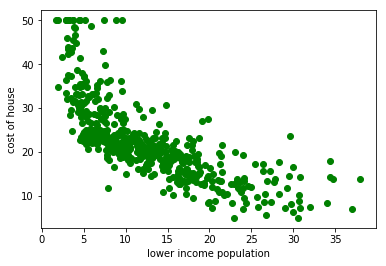

In [25]:
# ensure that matplotlib is working
%matplotlib inline
plt.scatter(data,target,color='green')
plt.xlabel('lower income population')
plt.ylabel('cost of house')
plt.show()

In [29]:
#regression
from sklearn.linear_model import LinearRegression

In [34]:
#create a regression model
reg=LinearRegression()

In [41]:
# fit the model
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
# prediction
pred=reg.predict(data)

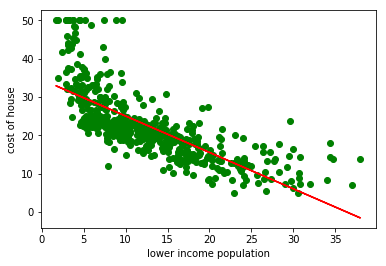

In [51]:
%matplotlib inline
plt.scatter(data,target,color='green')
plt.plot(data,pred,color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of house')
plt.show()

In [52]:
#circumventing curve issue 
from sklearn.preprocessing import PolynomialFeatures


In [53]:
#to allow mearging of models
from sklearn.pipeline import make_pipeline

In [54]:
model=make_pipeline(PolynomialFeatures(3),reg)
model.fit(data,target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [55]:
pred=model.predict(data)

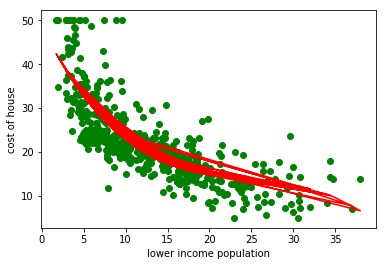

In [56]:
%matplotlib inline
plt.scatter(data,target,color='green')
plt.plot(data,pred,color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of house')
plt.show()

In [57]:
# r2 metric
from sklearn.metrics import r2_score

In [58]:
#predict
r2_score(pred,target)

0.47989118102738904